In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [97]:
filepath = 'C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineData_v4.xlsx'

df = pd.read_excel(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StateWellN      268 non-null    int64  
 1   StateWel_1      268 non-null    int64  
 2   LatitudeDD      268 non-null    float64
 3   Dlat            268 non-null    int64  
 4   Mlat            268 non-null    int64  
 5   Slat            268 non-null    float64
 6   LongitudeD      268 non-null    float64
 7   Dlong           268 non-null    int64  
 8   Mlong           268 non-null    int64  
 9   Slong           268 non-null    float64
 10  TDS_mg/L        268 non-null    float64
 11  WellDepth       268 non-null    int64  
 12  SAR             268 non-null    float64
 13  Hardness_mg/L   268 non-null    float64
 14  Calcium_mg/L    268 non-null    float64
 15  Magnesium_mg/L  268 non-null    float64
 16  Sulfate_mg/L    268 non-null    float64
 17  Chloride_mg/L   268 non-null    flo

In [98]:
df_variable = df[df.columns[10:]]
df_variable.drop(['Texture_SSURGO'], axis=1, inplace=True)
df_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TDS_mg/L        268 non-null    float64
 1   WellDepth       268 non-null    int64  
 2   SAR             268 non-null    float64
 3   Hardness_mg/L   268 non-null    float64
 4   Calcium_mg/L    268 non-null    float64
 5   Magnesium_mg/L  268 non-null    float64
 6   Sulfate_mg/L    268 non-null    float64
 7   Chloride_mg/L   268 non-null    float64
 8   Fluoride_mg/L   268 non-null    float64
 9   pH              268 non-null    float64
 10  Texture_Num     268 non-null    int64  
 11  Clay_SSURGO     268 non-null    float64
 12  SAR_SSURGO      268 non-null    int64  
 13  EC_SSURGO       268 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 29.4 KB


C:\Users\mengj\AppData\Local\Temp\ipykernel_7844\2022110355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variable.drop(['Texture_SSURGO'], axis=1, inplace=True)


In [99]:
# compute correlation
corr = df_variable.corr(method='kendall')
display(corr)

,TDS_mg/L,WellDepth,SAR,Hardness_mg/L,Calcium_mg/L,Magnesium_mg/L,Sulfate_mg/L,Chloride_mg/L,Fluoride_mg/L,pH,Texture_Num,Clay_SSURGO,SAR_SSURGO,EC_SSURGO
TDS_mg/L,1.000000,0.293652,0.542908,-0.063506,-0.064225,-0.071792,0.711378,0.534527,0.612225,0.190906,-0.081374,0.152236,0.003963,-0.031042
WellDepth,0.293652,1.000000,0.531396,-0.426399,-0.414358,-0.411823,0.213145,0.081041,0.368228,0.337820,-0.135569,0.181222,0.028708,0.030740
SAR,0.542908,0.531396,1.000000,-0.510258,-0.495083,-0.486147,0.360910,0.227734,0.607547,0.426811,-0.125960,0.210220,-0.009223,0.026637
Hardness_mg/L,-0.063506,-0.426399,-0.510258,1.000000,0.889018,0.820267,0.025848,0.177505,-0.249871,-0.469850,0.119158,-0.186933,0.033773,-0.029769
Calcium_mg/L,-0.064225,-0.414358,-0.495083,0.889018,1.000000,0.723759,0.028480,0.175519,-0.259108,-0.467172,0.113671,-0.179863,0.027700,-0.024033
Magnesium_mg/L,-0.071792,-0.411823,-0.486147,0.820267,0.723759,1.000000,0.016799,0.169196,-0.250923,-0.431063,0.117207,-0.190188,0.056249,-0.021643
Sulfate_mg/L,0.711378,0.213145,0.360910,0.025848,0.028480,0.016799,1.000000,0.491468,0.408394,0.044071,-0.058270,0.095114,-0.020321,-0.130923
Chloride_mg/L,0.534527,0.081041,0.227734,0.177505,0.175519,0.169196,0.491468,1.000000,0.330021,-0.060224,0.028756,-0.005532,0.012444,0.056342
Fluoride_mg/L,0.612225,0.368228,0.607547,-0.249871,-0.259108,-0.250923,0.408394,0.330021,1.000000,0.375512,-0.095901,0.207704,-0.036133,0.034208
pH,0.190906,0.337820,0.426811,-0.469850,-0.467172,-0.431063,0.044071,-0.060224,0.375512,1.000000,-0.121794,0.198309,-0.001807,0.062402


C:\Users\mengj\AppData\Local\Temp\ipykernel_7844\3331742946.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

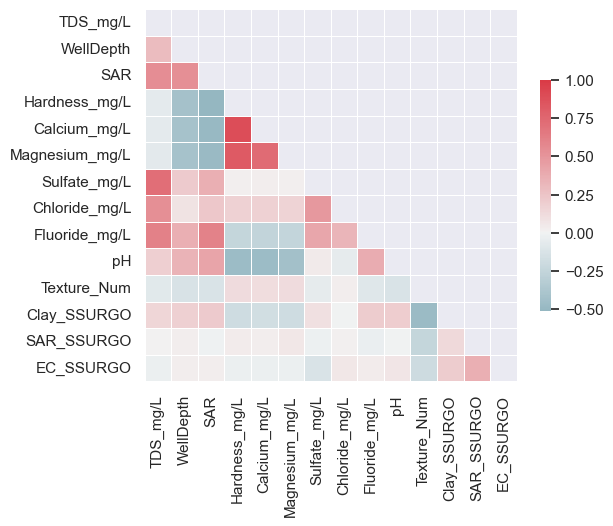

In [100]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [102]:
# compute MI
from sklearn.feature_selection import mutual_info_regression

df_X = df_variable.drop(['Fluoride_mg/L'], axis=1) # slect other columns
df_y = df_variable['Fluoride_mg/L'] # fluoride is the Y variable

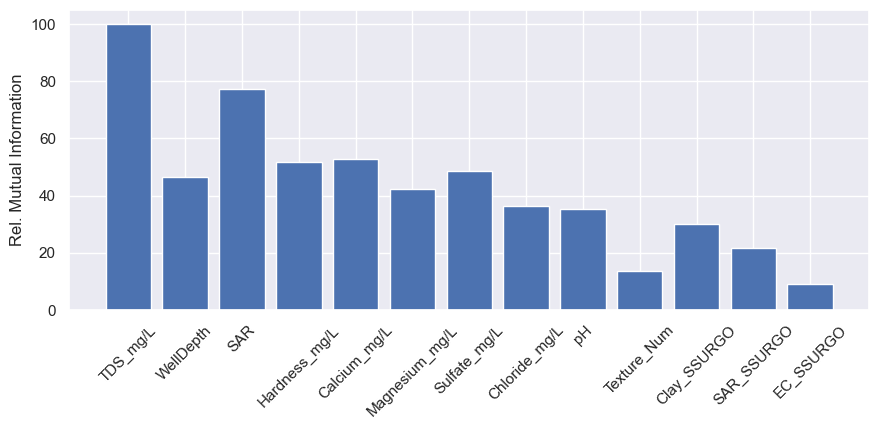

In [103]:
MI = mutual_info_regression(df_X,df_y)
MI = MI*100/np.max(MI)
cols = df_X.columns
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols,MI)
plt.ylabel('Rel. Mutual Information')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [113]:
# set label 1 for fluoride > 2, others are label 0
df['label'] = np.NaN
for i in df.index:
    if df['Fluoride_mg/L'][i] >= 2:
        df['label'][i] = 1
    else:
        df['label'][i] = 0


C:\Users\mengj\AppData\Local\Temp\ipykernel_7844\1650155209.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 0
C:\Users\mengj\AppData\Local\Temp\ipykernel_7844\1650155209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 1


In [114]:
df[df.columns[10:]].head(20)

,TDS_mg/L,WellDepth,SAR,Hardness_mg/L,Calcium_mg/L,Magnesium_mg/L,Sulfate_mg/L,Chloride_mg/L,Fluoride_mg/L,pH,Texture_SSURGO,Texture_Num,Clay_SSURGO,SAR_SSURGO,EC_SSURGO,label
0,360.000000,872,24.240000,6.000000,1.200000,0.850000,30.00,11.000000,1.000000,8.300000,Silty clay,2,55.0,1,2.0,0.0
1,551.500000,1044,27.722500,14.250000,2.250000,2.250000,42.25,12.750000,1.000000,8.750000,Silty clay,2,55.0,1,2.0,0.0
2,202.000000,1022,24.420000,2.000000,0.800000,0.050000,17.50,13.400000,0.300000,7.200000,Silty clay,2,55.0,1,2.0,0.0
3,2306.000000,900,76.957500,27.250000,7.000000,2.500000,18.25,980.250000,2.125000,8.150000,Silty clay,2,55.0,1,2.0,1.0
4,479.571429,950,51.971429,2.285714,0.800000,0.310000,68.00,11.500000,0.810000,8.734286,Silty clay,2,55.0,1,2.0,0.0
5,651.333333,1061,58.840000,3.666667,0.866667,0.506667,100.00,13.666667,0.866667,8.536667,Silty clay,2,55.0,1,2.0,0.0
6,320.000000,745,21.960000,7.000000,2.000000,0.500000,20.00,4.000000,0.800000,9.000000,Silty clay,2,55.0,1,2.0,0.0
7,333.500000,970,19.820000,7.500000,1.500000,1.000000,47.50,10.000000,0.700000,8.400000,Silty clay,2,55.0,1,2.0,0.0
8,798.000000,1023,61.182000,5.600000,1.000000,1.000000,74.00,29.000000,1.402000,8.812000,Silty clay,2,55.0,1,2.0,0.0
9,742.000000,1638,48.560000,6.000000,1.000000,1.000000,176.00,45.000000,1.200000,8.550000,Silty clay,2,55.0,1,2.0,0.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StateWellN      268 non-null    int64  
 1   StateWel_1      268 non-null    int64  
 2   LatitudeDD      268 non-null    float64
 3   Dlat            268 non-null    int64  
 4   Mlat            268 non-null    int64  
 5   Slat            268 non-null    float64
 6   LongitudeD      268 non-null    float64
 7   Dlong           268 non-null    int64  
 8   Mlong           268 non-null    int64  
 9   Slong           268 non-null    float64
 10  TDS_mg/L        268 non-null    float64
 11  WellDepth       268 non-null    int64  
 12  SAR             268 non-null    float64
 13  Hardness_mg/L   268 non-null    float64
 14  Calcium_mg/L    268 non-null    float64
 15  Magnesium_mg/L  268 non-null    float64
 16  Sulfate_mg/L    268 non-null    float64
 17  Chloride_mg/L   268 non-null    flo

In [116]:
df.to_excel('C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineData_label2.xlsx')

In [117]:
df_MI_X = df[df.columns[10:25]]
df_MI_X.drop(['Fluoride_mg/L','Texture_SSURGO'], axis=1, inplace=True)

C:\Users\mengj\AppData\Local\Temp\ipykernel_7844\1149047933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MI_X.drop(['Fluoride_mg/L','Texture_SSURGO'], axis=1, inplace=True)


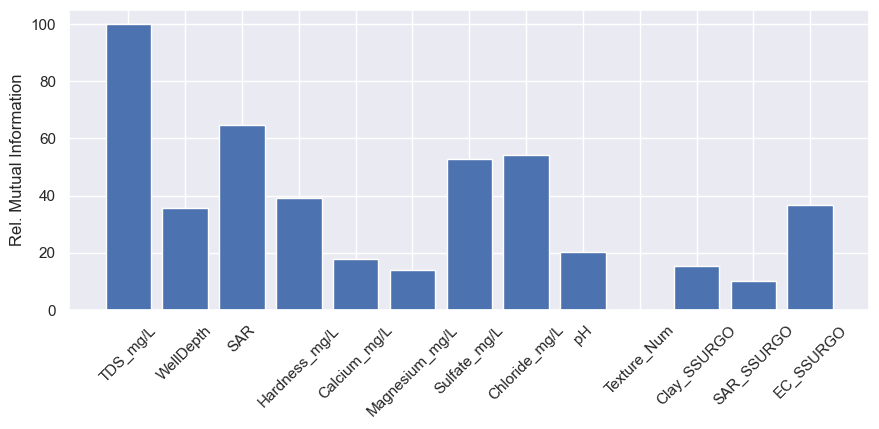

In [118]:
df_MI_y = df['label']
MI = mutual_info_regression(df_MI_X,df_MI_y)
MI = MI*100/np.max(MI)
cols = df_X.columns
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols,MI)
plt.ylabel('Rel. Mutual Information')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()